In [17]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.io
import math
import os
from sklearn.preprocessing import StandardScaler

In [18]:
sns.color_palette('Set1')
sns.set(color_codes=True, style='white', context='talk', font_scale=1)

In [28]:
simulation_names = ['linear', 'exponential', 'cubic', 'joint_normal', 'step',
                    'quadratic', 'w_shape', 'spiral', 'bernoulli', 'log',
                    'fourth_root', 'sine_4pi', 'sine_16pi', 'square', 'two_parabolas',
                    'circle', 'ellipse', 'diamond', 'multi_noise', 'multi_indept']
plot_titles = ['Linear', 'Exponential', 'Cubic','Joint Normal', 'Step', 'Quadratic', 'W-Shaped', 'Spiral', 
                 'Uncorrelated\nBernoulli', 'Logarithmic', 'Fourth Root', 'Sine (4$\pi$)',
               'Sine (16$\pi$)', 'Square', 'Two Parabolas', 'Circle', 'Ellipse', 'Diamond', 'Multiplicative\nNoise',
                'Multimodal\nIndependence']

In [29]:
def get_data(simulation_type):
    file_name_prefix = 'matlabsim_{}_dim1'.format(simulation_type)

    ori_X = scipy.io.loadmat(file_name_prefix + '_X_simplot.mat')['x_mat']
    ori_Y = scipy.io.loadmat(file_name_prefix + '_Y_simplot.mat')['y_mat']
    
    min_X = np.amin(ori_X)
    min_Y = np.amin(ori_Y)
    max_X = np.amax(ori_X-min_X)
    max_Y = np.amax(ori_Y-min_Y)
    
    matrix_X = (ori_X-min_X)*2/max_X - 1
    matrix_Y = (ori_Y-min_Y)*2/max_Y - 1
    
    return matrix_X, matrix_Y

In [30]:
def translate_by_val(matrix_X, val):
    # apply two sample transform
    mat_X = matrix_X + val
    
    return mat_X

In [31]:
def plot_all_simulations():
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(28,23), sharex=True, sharey=True)
    for simulation_type in range(1, 20):
        row = (simulation_type-1) // 5
        col = (simulation_type-1) % 5

        x, y = get_data(simulation_type)
        sim = simulation_type - 1
        val=[0.47, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 1.1, 0.7, 0.7, 0.6, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
        new_x = translate_by_val(x,0.45)

        ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub = sns.scatterplot(x=new_x[:,0], y=y[:,0], ax=axs[row][col])
        ax_sub.set_xticks([-1, 0, 1])
        ax_sub.set_yticks([-1, 0, 1])
        ax_sub.tick_params(labelsize=20)
        ax_sub.set_title(plot_titles[simulation_type-1], fontweight='bold', fontsize=27)

    # plot last sim outside, to get only one legend
    x, y = get_data(20)
    new_x = translate_by_val(x,0.45)
    ax_sub = sns.scatterplot(x=x[:,0], y=y[:,0], label='Normal', ax=axs[3][4])
    ax_sub = sns.scatterplot(x=new_x[:,0], y=y[:,0], label='Translated', ax=axs[3][4])
    ax_sub.set_title(plot_titles[19], fontweight='bold', fontsize=27)
    ax_sub.set_xticks([-1, 0, 1])
    ax_sub.tick_params(labelsize=20)

    leg = plt.legend(bbox_to_anchor=(0.5, 0.105), bbox_transform=plt.gcf().transFigure, ncol=5, loc='upper center', fontsize=27, markerscale=2)
    leg.get_frame().set_linewidth(0.0)
    plt.subplots_adjust(hspace=.25)
    plt.savefig('translated_simulations.pdf', bbox_inches='tight')
    plt.show()

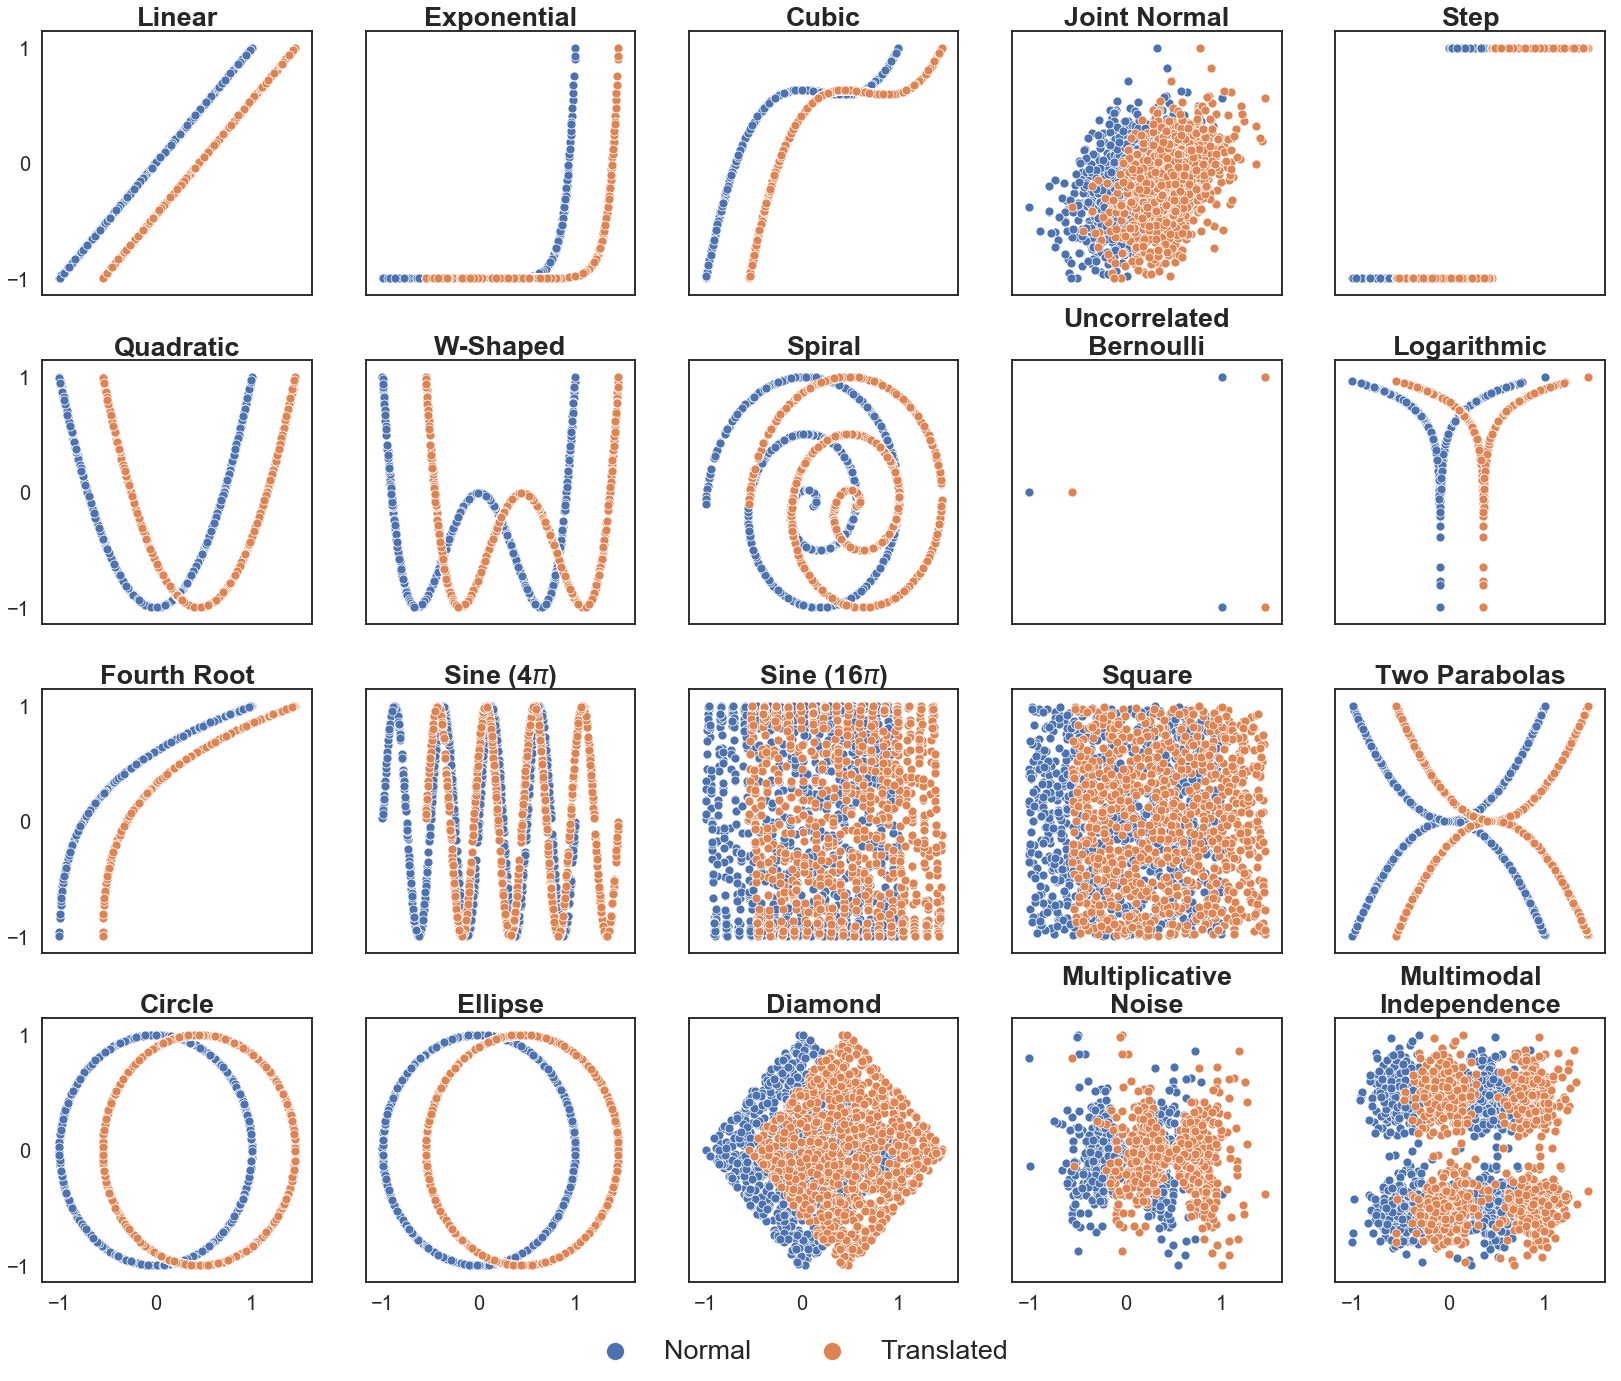

In [32]:
plot_all_simulations()